In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ccecc8ad1d8ab6868bb0beb01093a3ac


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ccecc8ad1d8ab6868bb0beb01093a3ac&q=Boston


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ponta do sol
Processing Record 2 of Set 1 | colesberg
Processing Record 3 of Set 1 | omsukchan
Processing Record 4 of Set 1 | namatanai
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | walvis bay
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | sambava
Processing Record 9 of Set 1 | faanui
Processing Record 10 of Set 1 | zhigansk
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | ketchikan
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | sao jose da coroa grande
Processing Record 17 of Set 1 | sitka
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | ust-kuyga
Processing Record 20 of Set 1 | yarensk
Processing Record 21 of Set 1 | urumqi
Processing Record 22 of Set 1 | victoria
Processing R

Processing Record 36 of Set 4 | yumen
Processing Record 37 of Set 4 | atuona
Processing Record 38 of Set 4 | sao felix do xingu
Processing Record 39 of Set 4 | vila franca do campo
Processing Record 40 of Set 4 | bartlesville
Processing Record 41 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | guangyuan
Processing Record 44 of Set 4 | grindavik
Processing Record 45 of Set 4 | san jeronimo
Processing Record 46 of Set 4 | yenagoa
Processing Record 47 of Set 4 | neiafu
Processing Record 48 of Set 4 | shirvan
Processing Record 49 of Set 4 | berekum
Processing Record 50 of Set 4 | codrington
Processing Record 1 of Set 5 | suba
Processing Record 2 of Set 5 | tucuman
Processing Record 3 of Set 5 | qaanaaq
Processing Record 4 of Set 5 | biak
Processing Record 5 of Set 5 | dingle
Processing Record 6 of Set 5 | bayan
Processing Record 7 of Set 5 | northam
Processing Record 8 of Set 5 | saquarema
Processing Record 9

Processing Record 28 of Set 8 | namtsy
Processing Record 29 of Set 8 | ambulu
Processing Record 30 of Set 8 | nautla
Processing Record 31 of Set 8 | maniitsoq
Processing Record 32 of Set 8 | paradwip
City not found. Skipping...
Processing Record 33 of Set 8 | isla mujeres
Processing Record 34 of Set 8 | izumo
Processing Record 35 of Set 8 | port hedland
Processing Record 36 of Set 8 | akdepe
Processing Record 37 of Set 8 | lazurne
Processing Record 38 of Set 8 | long xuyen
Processing Record 39 of Set 8 | cherskiy
Processing Record 40 of Set 8 | solsvik
City not found. Skipping...
Processing Record 41 of Set 8 | inverbervie
Processing Record 42 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 43 of Set 8 | damietta
Processing Record 44 of Set 8 | suez
Processing Record 45 of Set 8 | broken hill
Processing Record 46 of Set 8 | ixtapa
Processing Record 47 of Set 8 | tuatapere
Processing Record 48 of Set 8 | west lafayette
Processing Record 49 of Set 8 | gzhatsk
City 

City not found. Skipping...
Processing Record 17 of Set 12 | tungkang
City not found. Skipping...
Processing Record 18 of Set 12 | bud
Processing Record 19 of Set 12 | saint-junien
Processing Record 20 of Set 12 | merauke
Processing Record 21 of Set 12 | kerteh
City not found. Skipping...
Processing Record 22 of Set 12 | dengfeng
Processing Record 23 of Set 12 | mogadishu
Processing Record 24 of Set 12 | pingzhuang
Processing Record 25 of Set 12 | gnjilane
Processing Record 26 of Set 12 | san luis
Processing Record 27 of Set 12 | alekseyevsk
Processing Record 28 of Set 12 | garden city
Processing Record 29 of Set 12 | santa rosa
Processing Record 30 of Set 12 | dali
Processing Record 31 of Set 12 | santiago de cuba
Processing Record 32 of Set 12 | lemesos
City not found. Skipping...
Processing Record 33 of Set 12 | taltal
Processing Record 34 of Set 12 | monte santo de minas
Processing Record 35 of Set 12 | pangoa
Processing Record 36 of Set 12 | muravlenko
Processing Record 37 of Set 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta Do Sol,32.6667,-17.1000,61.05,87,97,9.53,PT,2022-02-19 03:10:40
1,Colesberg,-30.7200,25.0972,63.36,78,76,4.18,ZA,2022-02-19 03:10:41
2,Omsukchan,62.5333,155.8000,-19.59,97,98,5.53,RU,2022-02-19 03:10:41
3,Namatanai,-3.6667,152.4333,85.32,71,98,13.38,PG,2022-02-19 03:10:41
4,Yellowknife,62.4560,-114.3525,-19.71,98,100,5.17,CA,2022-02-19 03:06:21
5,Walvis Bay,-22.9575,14.5053,71.10,87,57,6.60,NA,2022-02-19 03:10:42
6,Avarua,-21.2078,-159.7750,82.45,74,20,10.36,CK,2022-02-19 03:10:42
7,Sambava,-14.2667,50.1667,74.34,82,100,7.43,MG,2022-02-19 03:10:42
8,Faanui,-16.4833,-151.7500,80.89,72,62,9.73,PF,2022-02-19 03:10:43
9,Zhigansk,66.7697,123.3711,-27.18,97,62,3.18,RU,2022-02-19 03:10:43


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ponta Do Sol,PT,2022-02-19 03:10:40,32.6667,-17.1000,61.05,87,97,9.53
1,Colesberg,ZA,2022-02-19 03:10:41,-30.7200,25.0972,63.36,78,76,4.18
2,Omsukchan,RU,2022-02-19 03:10:41,62.5333,155.8000,-19.59,97,98,5.53
3,Namatanai,PG,2022-02-19 03:10:41,-3.6667,152.4333,85.32,71,98,13.38
4,Yellowknife,CA,2022-02-19 03:06:21,62.4560,-114.3525,-19.71,98,100,5.17
...,...,...,...,...,...,...,...,...,...
538,Macrohon,PH,2022-02-19 03:24:53,10.0797,124.9431,82.18,75,100,9.60
539,Banepa,NP,2022-02-19 03:24:54,27.6298,85.5214,52.12,76,40,2.30
540,Novyy Nekouz,RU,2022-02-19 03:24:54,57.9029,38.0700,30.47,88,100,11.01
541,Gamba,GA,2022-02-19 03:24:54,-2.6500,10.0000,78.31,86,74,5.46


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

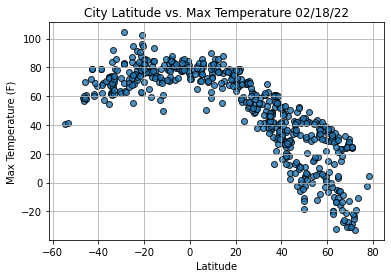

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

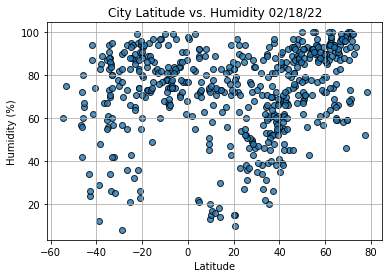

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

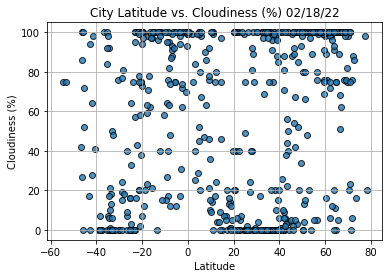

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

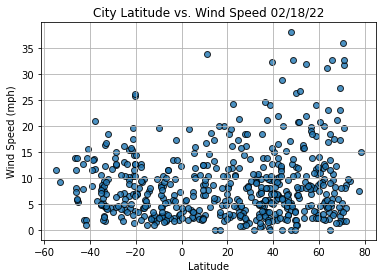

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                    Hithadhoo
Country                        MV
Date          2022-02-19 03:10:44
Lat                          -0.6
Lng                       73.0833
Max Temp                    81.79
Humidity                       68
Cloudiness                     93
Wind Speed                   7.27
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
538     True
539     True
540     True
541    False
542    False
Name: Lat, Length: 543, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ponta Do Sol,PT,2022-02-19 03:10:40,32.6667,-17.1000,61.05,87,97,9.53
2,Omsukchan,RU,2022-02-19 03:10:41,62.5333,155.8000,-19.59,97,98,5.53
4,Yellowknife,CA,2022-02-19 03:06:21,62.4560,-114.3525,-19.71,98,100,5.17
9,Zhigansk,RU,2022-02-19 03:10:43,66.7697,123.3711,-27.18,97,62,3.18
10,Tuktoyaktuk,CA,2022-02-19 03:10:43,69.4541,-133.0374,-12.73,98,99,2.71


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

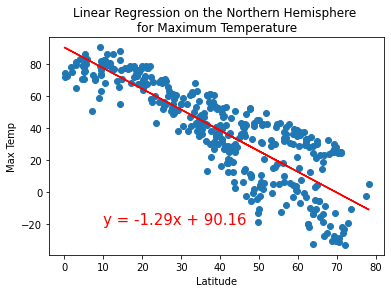

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,-20))

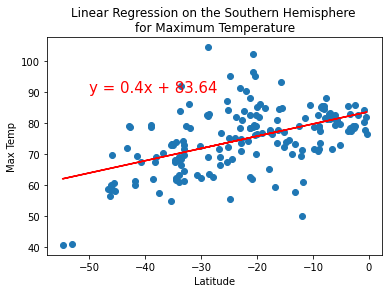

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))


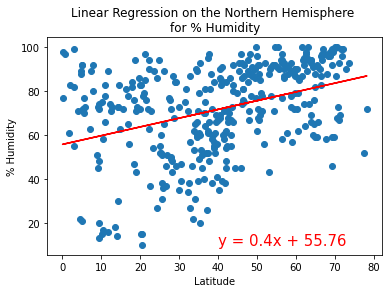

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

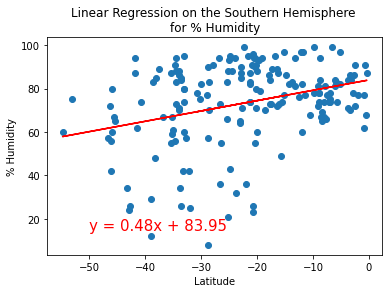

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

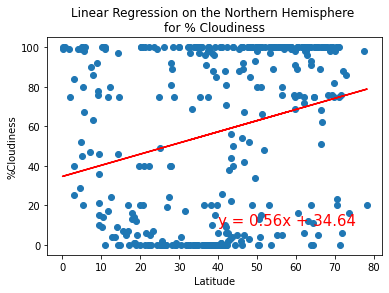

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '%Cloudiness',(40,10))

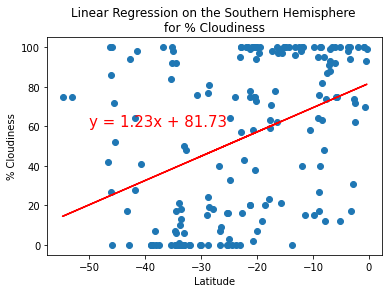

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

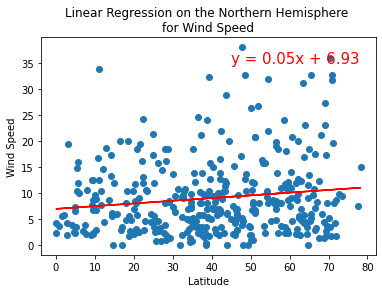

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(45,35))


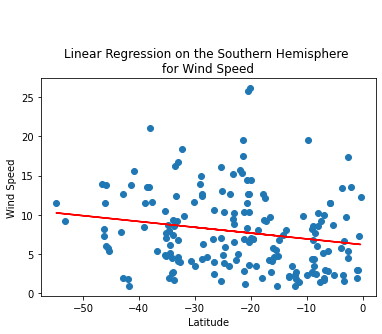

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))